In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from statistics import mean
from random import sample

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from pyuplift.variable_selection import *
from pyuplift.transformation import *
from pyuplift.datasets import load_linear
from pyuplift.model_selection import treatment_cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = load_linear(50000)

In [3]:
df.head()

,x1,x2,x3,t,y
0,-46.820879,-1.000513,-47.933015,0,0.000000
1,-82.282485,3.161651,15.259676,0,0.000000
2,-6.538010,9.776074,79.618924,0,197.728409
3,-71.336192,-0.126137,-136.569774,1,0.000000
4,90.635089,-15.410243,-100.697671,0,348.833368


In [4]:
models = {
    'Econometric (Linear regression)': Econometric(LinearRegression(n_jobs=-1)),
    'Econometric (Random forest)': Econometric(RandomForestRegressor(n_jobs=-1)),

    'Two Model (Linear regression)': TwoModel(LinearRegression(n_jobs=-1), LinearRegression(n_jobs=-1)),
    'Two Model (Random forest)': TwoModel(RandomForestRegressor(n_jobs=-1), RandomForestRegressor(n_jobs=-1)),

    'Dummy (Linear regression)': Dummy(LinearRegression(n_jobs=-1)),
    'Dummy (Random forest)': Dummy(RandomForestRegressor(n_jobs=-1)),
    
    'Lai (Logistic Regression)': Lai(LogisticRegression(n_jobs=-1)),
    'Lai (Random forest)': Lai(RandomForestClassifier(n_jobs=-1)),
    
    'WeightedLai (Logistic regression)': WeightedLai(LogisticRegression(n_jobs=-1)),
    'WeightedLai (Random forest)': WeightedLai(RandomForestClassifier(n_jobs=-1)),

    'Kane (Logistic regression)': Kane(LogisticRegression(n_jobs=-1)),
    'Kane (Random forest)': Kane(RandomForestClassifier(n_jobs=-1)),
    
    'GeneralizedKane (Logistic regression)': GeneralizedKane(LogisticRegression(n_jobs=-1)),
    'GeneralizedKane (Random forest)': GeneralizedKane(RandomForestClassifier(n_jobs=-1)),

    'Reflective (Logistic regression)': Reflective(LogisticRegression(n_jobs=-1)),
    'Reflective (Random forest)': Reflective(RandomForestClassifier(n_jobs=-1)),
    
    'Pessimistic (Logistic regression)': Pessimistic(LogisticRegression(n_jobs=-1)),
    'Pessimistic (Random forest)': Pessimistic(RandomForestClassifier(n_jobs=-1)),
    
    'Jaskowski (Logistic regression)': Jaskowski(LogisticRegression(n_jobs=-1)),
    'Jaskowski (Random forest)': Jaskowski(RandomForestClassifier(n_jobs=-1)),
}

In [5]:
X = df.drop(['t', 'y'], axis=1).values
y = df['y'].values
t = df['t'].values

In [6]:
cv = 5
seeds = [111, 222, 333, 444, 555]

In [7]:
%%time
model_names, model_scores = [], []
for model_name in models:
    print(model_name)
    scores = treatment_cross_val_score(X, y, t, models[model_name], cv, seeds=seeds)
    for score in scores:
        model_names.append(model_name)
        model_scores.append(score)
df_stats = pd.DataFrame(data={'Model': model_names, 'Uplift': model_scores})

Econometric (Linear regression)
Econometric (Random forest)
Two Model (Linear regression)
Two Model (Random forest)
Dummy (Linear regression)
Dummy (Random forest)
Lai (Logistic Regression)
Lai (Random forest)
WeightedLai (Logistic regression)
WeightedLai (Random forest)
Kane (Logistic regression)
Kane (Random forest)
GeneralizedKane (Logistic regression)
GeneralizedKane (Random forest)
Reflective (Logistic regression)
Reflective (Random forest)
Pessimistic (Logistic regression)
Pessimistic (Random forest)
Jaskowski (Logistic regression)
Jaskowski (Random forest)
Wall time: 53min 7s


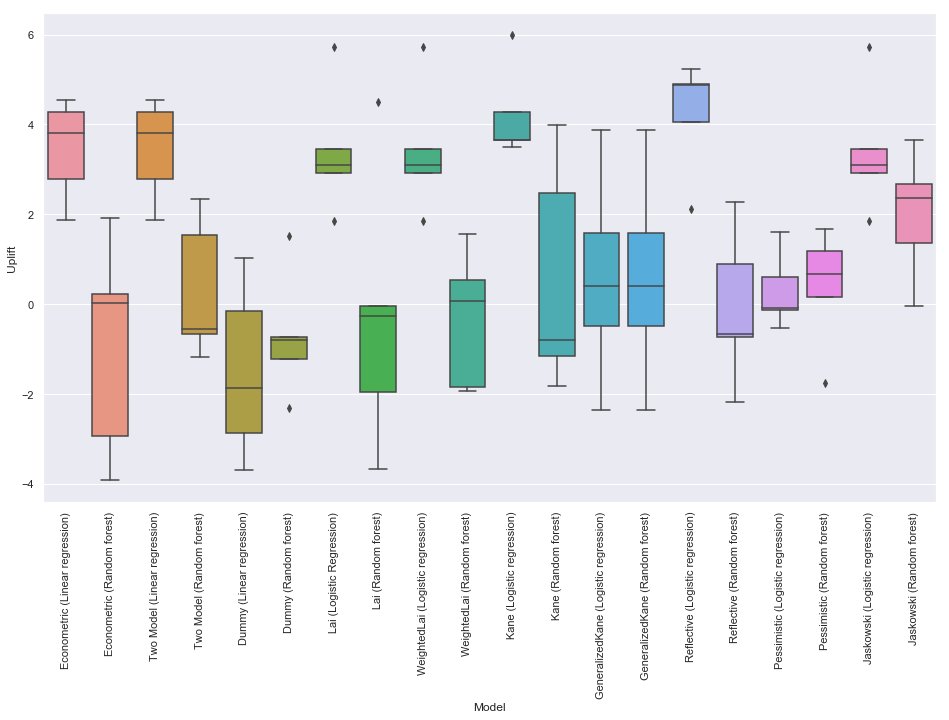

In [8]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16, 9)})
ax = sns.boxplot(x="Model", y="Uplift", data=df_stats)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);